In [1]:
import os
from PIL import Image
import numpy as np

import torch
import torch.nn as nn
import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt 

#-- 
import streamlit as st
import numpy as np
from PIL import Image
import time
from scipy.spatial.distance import cdist

In [2]:
query_img_path = "/disk3/eric/dataset/VISION_SOFS/WEAPON_4/query/query_2.png"
query_img = Image.open(query_img_path)
plt.figure(figsize=(12,12))
#plt.imshow(query_img)
plt.show()

filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/query/query_2.png


<Figure size 1200x1200 with 0 Axes>

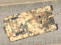

In [3]:
query_img

In [4]:
images = os.listdir("/disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop")
os.environ["TORCH_HOME"] = "/disk3/eric/weight"
model = torchvision.models.resnet18(pretrained=True) #DEFAULT
model.eval()
root = "/disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/"


transform = transforms.Compose([
    transforms.Resize((256 , 256)) ,
    transforms.ToTensor() ,
    transforms.Normalize(mean = [0.485 , 0.456 , 0.406] , std = [0.229 , 0.224 , 0.225])
])


/home/eric/anaconda3/envs/trex/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/eric/anaconda3/envs/trex/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [44]:
activation = {}
def get_activation(name):
    def hook(model , input , output):
        activation[name] = output.detach()
    return hook

model.avgpool.register_forward_hook(get_activation("avgpool"))

#-- 
all_names = []
all_heats = []
all_vecs = []
#-- 

with torch.no_grad():
    for i , file in enumerate(images):
            img = Image.open(os.path.join(root + file))
            #print(img.size)
            img = transform(img)
            out = model(img[None , ...])
            vec = activation["avgpool"].numpy().squeeze()[None , ...]
            
            all_names.append(file)
            all_heats.append(out)
            all_vecs.append(vec)

#---
all_heats = np.vstack(all_heats)
all_vecs = np.vstack(all_vecs)

print(all_heats.shape)

filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_7.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_8.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_1.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/query_2.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_11.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_10.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_12.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_13.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_14.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_6.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_3.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop

In [45]:
idx = 3
print("target idx : ", idx)
print("target name : ", all_names[idx])

target_vec = all_vecs[idx]

top5 = cdist(target_vec[None , ...] , all_vecs,metric="cosine").squeeze().argsort()[1:10]

top_imgs =[]
for i in range(9):
    img_ = Image.open(os.path.join(root, all_names[top5[i]]))
    top_imgs.append(img_)

target idx :  3
target name :  query_2.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_0.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_1.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_5.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_9.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_7.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_12.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_13.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_2.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_3.png


In [63]:
top5

array([12,  2, 14, 13,  0,  6,  7, 16, 10])

In [46]:
target_vec.shape

(512,)

In [50]:
all_vecs.shape

(17, 512)

In [73]:
all_vecs[0].shape

(512,)

In [77]:
np.linalg.norm(all_vecs,axis=1,keepdims=True).shape

(17, 1)

In [78]:
import collections
emp_ = collections.defaultdict(list)


for i,v in enumerate(all_vecs):
    
    norm_target_vec = target_vec / np.linalg.norm(target_vec)
    normed_v = v / np.linalg.norm(v)
    
    cos_score = np.dot(norm_target_vec, normed_v)
    emp_[i]=cos_score

In [79]:
emp_

defaultdict(list,
            {0: 0.72050184,
             1: 0.68794006,
             2: 0.83276606,
             3: 1.0,
             4: 0.6660758,
             5: 0.57657844,
             6: 0.71034944,
             7: 0.7099525,
             8: 0.46781066,
             9: 0.65075755,
             10: 0.7026483,
             11: 0.58457637,
             12: 0.8450366,
             13: 0.7311828,
             14: 0.73944676,
             15: 0.5502056,
             16: 0.7089861})

In [82]:
sorted_dict = dict(sorted(emp_.items(), key=lambda item: item[1], reverse=True))

In [83]:
sorted_dict

{3: 1.0,
 12: 0.8450366,
 2: 0.83276606,
 14: 0.73944676,
 13: 0.7311828,
 0: 0.72050184,
 6: 0.71034944,
 7: 0.7099525,
 16: 0.7089861,
 10: 0.7026483,
 1: 0.68794006,
 4: 0.6660758,
 9: 0.65075755,
 11: 0.58457637,
 5: 0.57657844,
 15: 0.5502056,
 8: 0.46781066}